In [3]:
!pip install plantcv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.5/264.5 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 20.0 MB/s eta 0:00:00


In [5]:
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import plot_model
from plantcv import plantcv as pcv
from plantcv.parallel import WorkflowInputs
# revisar versión
pcv.__version__
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3872s 12s/step - accuracy: 0.3533 - loss: 2.6164 - val_accuracy: 0.6950 - val_loss: 0.9009
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1060s 3s/step - accuracy: 0.7573 - loss: 0.6864 - val_accuracy: 0.7080 - val_loss: 0.9759
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1035s 3s/step - accuracy: 0.8398 - loss: 0.4610 - val_accuracy: 0.6770 - val_loss: 1.2349
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1002s 3s/step - accuracy: 0.8706 - loss: 0.3787 - val_accuracy: 0.7530 - val_loss: 0.9257
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1006s 3s/step - accuracy: 0.8876 - loss: 0.3167 - val_accuracy: 0.6680 - val_loss: 1.4176
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1001s 3s/step - accuracy: 0.9044 - loss: 0.2730 - val_accuracy: 0.7680 - val_loss: 0.9586
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 998s 3s/step - accuracy: 0.9150 - loss: 0.2360 - val_accuracy: 0.8410 - val_loss: 0.5792
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1013s 3s/step - accuracy: 0.9221 - loss: 0.2168 - 

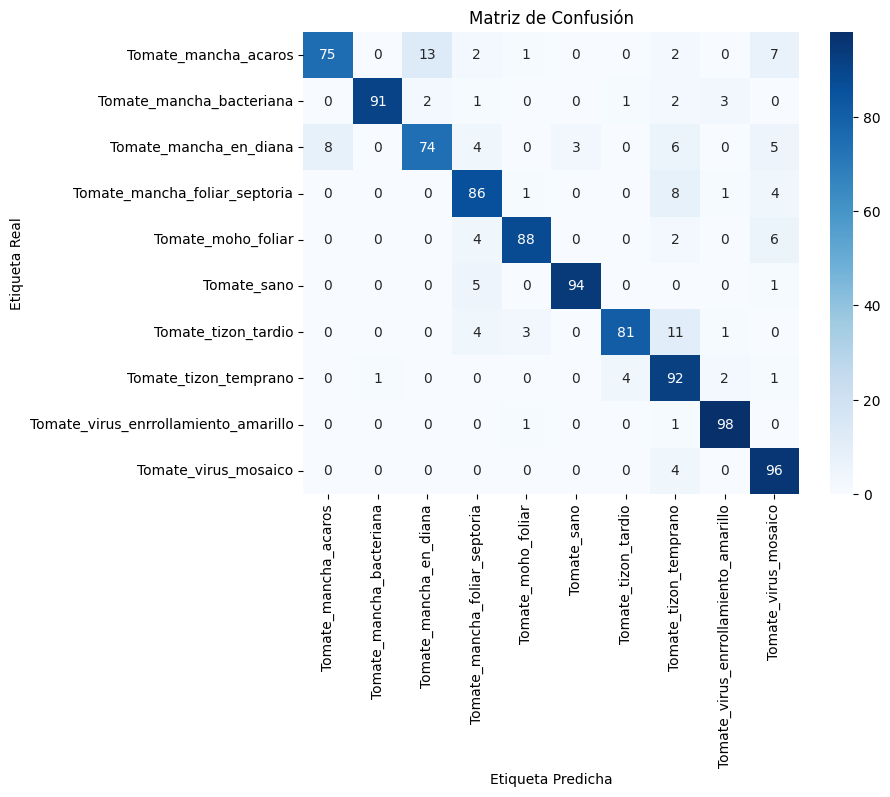

                                      precision    recall  f1-score   support

                Tomate_mancha_acaros       0.90      0.75      0.82       100
            Tomate_mancha_bacteriana       0.99      0.91      0.95       100
              Tomate_mancha_en_diana       0.83      0.74      0.78       100
       Tomate_mancha_foliar_septoria       0.81      0.86      0.83       100
                  Tomate_moho_foliar       0.94      0.88      0.91       100
                         Tomate_sano       0.97      0.94      0.95       100
                 Tomate_tizon_tardio       0.94      0.81      0.87       100
               Tomate_tizon_temprano       0.72      0.92      0.81       100
Tomate_virus_enrrollamiento_amarillo       0.93      0.98      0.96       100
                Tomate_virus_mosaico       0.80      0.96      0.87       100

                            accuracy                           0.88      1000
                           macro avg       0.88      0.88     

In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Montar Google Drive (si estás en Colab)
from google.colab import drive
drive.mount('/content/drive')

# Rutas de las carpetas
train_dir = '/content/drive/MyDrive/Big_Data/Proyecto_final/tomato/train'
val_dir = '/content/drive/MyDrive/Big_Data/Proyecto_final/tomato/val'

# Parámetros
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 10

# Aumentación de datos
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_dir,
                                              target_size=(IMG_SIZE, IMG_SIZE),
                                              batch_size=BATCH_SIZE,
                                              class_mode='categorical')

val_gen = val_datagen.flow_from_directory(val_dir,
                                          target_size=(IMG_SIZE, IMG_SIZE),
                                          batch_size=BATCH_SIZE,
                                          class_mode='categorical',
                                          shuffle=False)

# Definir modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo
history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=EPOCHS)

# Evaluar modelo
val_gen.reset()
pred = model.predict(val_gen)
y_pred = np.argmax(pred, axis=1)
y_true = val_gen.classes
labels = list(val_gen.class_indices.keys())

# Matriz de confusión
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()

# Reporte de clasificación
print(classification_report(y_true, y_pred, target_names=labels))